('父亲', 98)
('背影', 54)
('作者', 39)
('儿子', 28)
('铁道', 17)
('表现', 17)
('感情', 15)
('文章', 15)
('橘子', 14)
('散文', 11)


E:\anaconda3\envs\baidu_paddle\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 29238 (\N{CJK UNIFIED IDEOGRAPH-7236}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\anaconda3\envs\baidu_paddle\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20146 (\N{CJK UNIFIED IDEOGRAPH-4EB2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\anaconda3\envs\baidu_paddle\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 32972 (\N{CJK UNIFIED IDEOGRAPH-80CC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\anaconda3\envs\baidu_paddle\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 24433 (\N{CJK UNIFIED IDEOGRAPH-5F71}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\anaconda3\envs\baidu_paddle\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20316 (\N{CJK UNIFIED IDEOGRAPH-4F5C}) missing from current font.
  

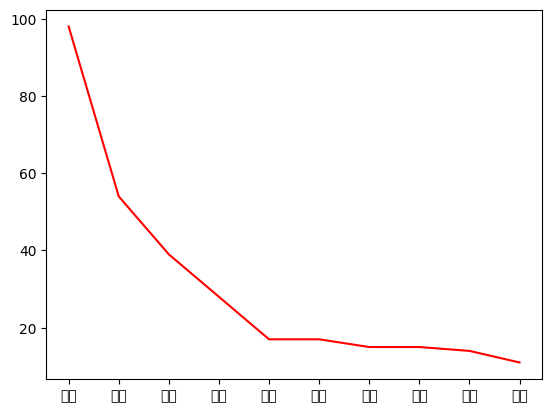

In [3]:
import jieba
with open('test.txt','r', encoding = 'UTF-8') as novelFile:
    novel = novelFile.read()#获取文本
stopwords = [line.strip() for line in open('stop.txt', 'r', encoding = 'UTF-8').readlines()]#移除头和尾
novelList = list(jieba.lcut(novel))#用于中文的分词
novelDict = {}#数据字典  用于记录数据

for word in novelList:
    if word not in stopwords:
        if len(word) == 1:
            continue
        else:
            novelDict[word] = novelDict.get(word, 0) + 1#如果原来字典不存在  则为0  否则，是1
novelListSorted = list(novelDict.items())#将原来字典转化为列表的形式  然后进行处理
novelListSorted.sort(key=lambda e:e[1], reverse=True)#这个key由词频决定

#打印出前10的 词频
topNum = 0
for topWordTup in novelListSorted[:10]:
    print(topWordTup)
    
from matplotlib import pyplot as plt

x = [c for c,v in novelListSorted]
y = [v for c,v in novelListSorted]

plt.plot(x[:10], y[:10], color = 'r')# 画出词频图
plt.show()


E:\anaconda3\envs\baidu_paddle\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  


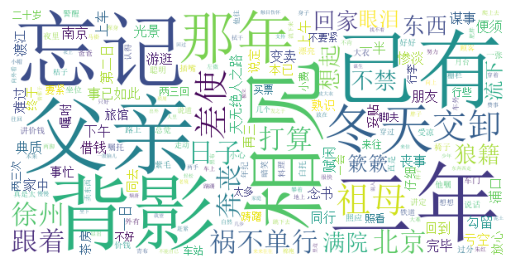

In [11]:
from wordcloud import WordCloud, ImageColorGenerator
import jieba
import matplotlib.pyplot as plt
from imageio import imread

bg_pic = imread('图1.png')

#生成词云的图片
wordcloud = WordCloud(mask=None, background_color='white',scale=1.5,font_path='msyh.ttc').generate(' '.join(novelDict.keys()))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()